In [1]:
# Surfaces

In [2]:
import numpy as np
import pandas as pd
from volumetricspy import Surface
import matplotlib.pyplot as plt
import seaborn as sns
import pyvista as pv

In [3]:
s1 = Surface(name='anticline')
s1.from_z_map('anticline',crs=3117)

/opt/anaconda3/envs/volumetricspy/lib/python3.8/site-packages/zmapio/zmap.py:189: UserWarning: to_dataframe will be renamed to to_pandas in 0.7.0
  warnings.warn("to_dataframe will be renamed to to_pandas in 0.7.0")


In [4]:
_,_,z = s1.get_mesh()
print(z.shape)

(160, 114)


<a list of 7 text.Text objects>

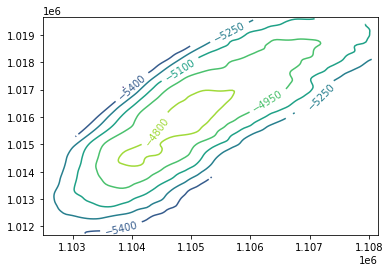

In [5]:
fig, ax = plt.subplots()
CS = s1.contour(ax=ax)
ax.clabel(CS, inline=True, fontsize=10)

              y             x            z  n
0  1.011892e+06  1.103984e+06 -5463.754044  0
1  1.011895e+06  1.103985e+06 -5463.754044  0
2  1.011941e+06  1.104010e+06 -5463.754044  1
3  1.011963e+06  1.104035e+06 -5463.754044  1
4  1.011984e+06  1.104084e+06 -5463.754044  1


<AxesSubplot:xlabel='x', ylabel='y'>

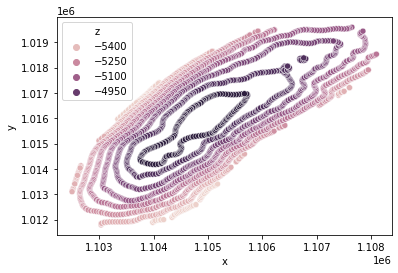

In [6]:
ct = s1.get_contours()
print(ct.head())
sns.scatterplot(data=ct, x='x', y='y', hue='z')

                x             y            z      delta_x    delta_y     angle
793  1.103248e+06  1.015793e+06 -5558.169922 -1842.751472 -29.437870 -3.125619
790  1.103248e+06  1.015793e+06 -5558.169922 -1842.751472 -29.437870 -3.125619
789  1.103248e+06  1.015793e+06 -5558.169922 -1842.751480 -29.437879 -3.125619
763  1.103248e+06  1.015793e+06 -5558.169922 -1842.751480 -29.437879 -3.125619
762  1.103198e+06  1.015743e+06 -5558.169922 -1892.751471 -79.437870 -3.099648


<AxesSubplot:xlabel='x', ylabel='y'>

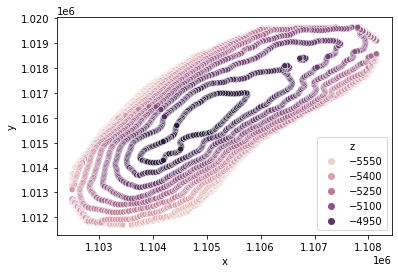

In [7]:
ct = s1.get_contours_bound()
print(ct.head())
sns.scatterplot(data=ct, x='x', y='y', hue='z')

In [8]:
s1.get_contours_area_bounds(levels=[-5000,-4950,-4900,-4850,-4801])

,area
-5000.0,2441.519715
-4950.0,1909.766003
-4900.0,1334.268946
-4850.0,868.904953
-4801.0,420.231630


In [9]:
s1.get_contours_area_mesh(levels=[-5000,-4950,-4900,-4850,-4800])

,area
-5000,2444.473366
-4950,1908.529218
-4900,1328.128873
-4850,866.895834
-4800,418.629185


In [10]:
s = s1.get_contours_gdf(levels=[-5000,-4950,-4900,-4850,-4800]).reset_index()
s

,index,level,geometry
0,0,-5000,"MULTIPOLYGON (((1107305.877 1019104.450, 11072..."
1,1,-4950,"MULTIPOLYGON (((1106859.824 1018803.492, 11068..."
2,2,-4900,"MULTIPOLYGON (((1106463.333 1018158.484, 11064..."
3,3,-4850,"MULTIPOLYGON (((1106265.087 1017565.121, 11062..."
4,4,-4800,"MULTIPOLYGON (((1105670.350 1016942.618, 11056..."


In [11]:
s1.surface_map(fill_color='YlGn')

In [12]:
s1.get_z(1105670.350, 1016942.618)

array(-4796.27118937)

In [13]:
mesh = s1.structured_surface_vtk()

In [14]:
grid = s1.make_grid_vtk(dz=-10, nz=5)
grid.save('make_grid1.vtk', binary=False)